In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

In [2]:
# load data
df = pd.read_csv(r"D:\BBBB\学校课程\MLF\Kaggle-Give-Me-Some-Data\cs-training.csv",index_col=0)

In [3]:
# fill missing values with mean
df.fillna(df.mean(), inplace = True)

In [4]:
# from imblearn.over_sampling import SMOTE

# # 初始化SMOTE对象
# smote = SMOTE()

# # 对数据进行过采样
# X, y = smote.fit_resample(X, y)


In [5]:
# select 2 features
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sum(y)/len(y)

0.06684

In [6]:
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.0001)
lr.fit(X_train, y_train)
coef = lr.coef_[0]
print(coef)
print(np.sort(coef))
indices = abs(coef).argsort()[-2:]
selected_features = X.columns[indices]
print(selected_features)

[-1.13124827e-05 -4.56192880e-02  1.06722183e-02 -2.47260783e-05
 -5.82644962e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-4.56192880e-02 -5.82644962e-05 -2.47260783e-05 -1.13124827e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.06722183e-02]
Index(['NumberOfTime30-59DaysPastDueNotWorse', 'age'], dtype='object')


In [7]:
scaler = StandardScaler()
# 使用StandardScaler的fit_transform方法对DataFrame进行标准化
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.001)
lr.fit(X_scaled_train, y_train)
coef = lr.coef_[0]
print(coef)
print(np.sort(coef))
indices = abs(coef).argsort()[-2:]
selected_features = X.columns[indices]
print(selected_features)

[ 0.         -0.29283524  0.11634738  0.          0.          0.
  0.          0.          0.          0.        ]
[-0.29283524  0.          0.          0.          0.          0.
  0.          0.          0.          0.11634738]
Index(['NumberOfTime30-59DaysPastDueNotWorse', 'age'], dtype='object')


In [8]:
# from sklearn.preprocessing import StandardScaler

# lower_bound = 0.05
# upper_bound = 0.95

# X = df.drop('SeriousDlqin2yrs', axis=1)

# for feature in X.columns:
#     # 计算这些界限对应的值
#     lower_limit = X[feature].quantile(lower_bound)
#     upper_limit = X[feature].quantile(upper_bound)

#     # 替换极端值
#     X[feature] = np.where(X[feature] < lower_limit, lower_limit, X[feature])
#     X[feature] = np.where(X[feature] > upper_limit, upper_limit, X[feature])


# # 创建一个StandardScaler对象
# scaler = StandardScaler()
# # 使用StandardScaler的fit_transform方法对DataFrame进行标准化
# X_scaled = scaler.fit_transform(X)

# # 将返回的numpy数组转换回DataFrame，并保持原来的列名
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# y = df['SeriousDlqin2yrs']
# lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.00005, class_weight='balanced')
# lr.fit(X_scaled, y)
# coef = lr.coef_[0]
# print(coef)
# print(np.sort(coef))
# indices = abs(coef).argsort()[-2:]
# selected_features = X_scaled.columns[indices]
# print(selected_features)

In [9]:
XX_train = X_scaled_train[:, indices]
XX_test = X_scaled_test[:, indices]
XX = np.vstack((XX_train, XX_test))

In [10]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

### Logistic 

In [11]:
for C in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    lr = LogisticRegression(C = C)
    lr.fit(XX_train, y_train)
    y_pred = lr.predict(XX_train)
    print(f'Logistic Regression accuracy train: C {C} : {accuracy_score(y_train, y_pred)}')

Logistic Regression accuracy train: C 1e-05 : 0.93275
Logistic Regression accuracy train: C 0.0001 : 0.932875
Logistic Regression accuracy train: C 0.001 : 0.9329416666666667
Logistic Regression accuracy train: C 0.01 : 0.9329416666666667
Logistic Regression accuracy train: C 0.1 : 0.9329416666666667
Logistic Regression accuracy train: C 1 : 0.9329416666666667


Logistic Regression accuracy train: 0.9329416666666667
Logistic Regression accuracy test: 0.9348666666666666
0.06684


C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


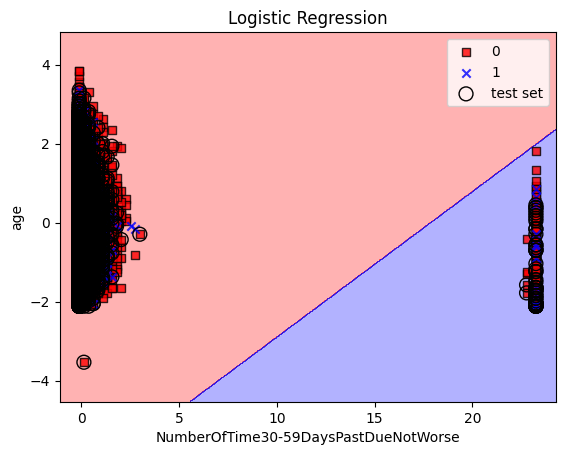

In [12]:
lr = LogisticRegression(C = 0.001)
# Logistic Regression
lr.fit(XX_train, y_train)
y_pred = lr.predict(XX_train)
print(f'Logistic Regression accuracy train: {accuracy_score(y_train, y_pred)}')
y_pred = lr.predict(XX_test)
print(f'Logistic Regression accuracy test: {accuracy_score(y_test, y_pred)}')

plot_decision_regions(XX, y.values, classifier=lr, test_idx=range(XX_train.shape[0], 150000))
plt.xlabel(f'{selected_features[0]}')
plt.ylabel(f'{selected_features[1]}')  # 标准化之后，值确实就在这个范围，纵坐标没画错
plt.title('Logistic Regression')
plt.legend()
print(sum(y)/len(y))
plt.show()

## SVC

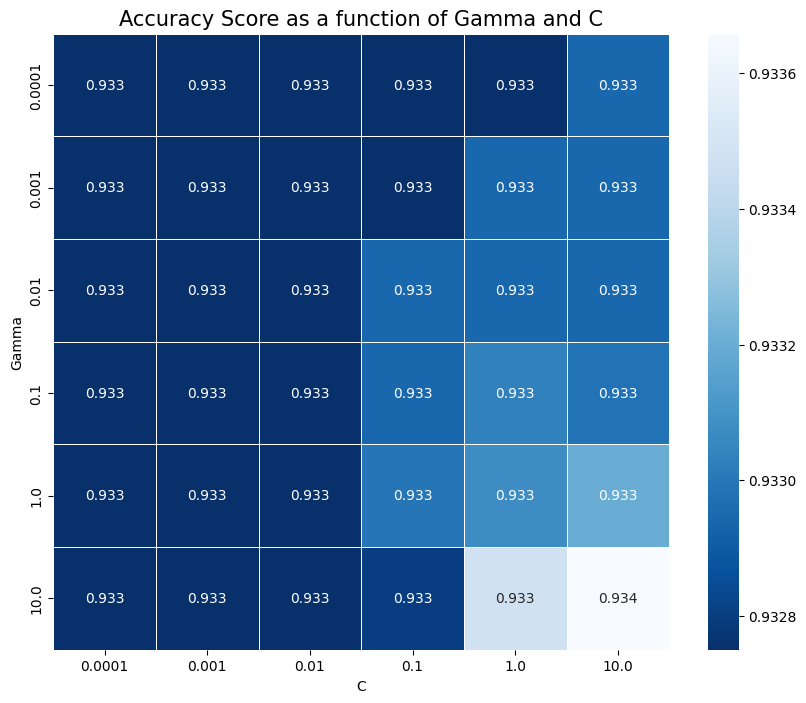

In [13]:
import seaborn as sns
results = []
for C in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
        lr =  SVC(gamma = gamma, C = C, kernel = 'rbf')
        lr.fit(XX_train, y_train)
        y_pred = lr.predict(XX_train)
        accuracy = accuracy_score(y_train, y_pred)
        results.append({'C': C, 'gamma': gamma, 'accuracy': accuracy})

df = pd.DataFrame(results)
pivot_df = df.pivot(index='gamma', columns='C', values='accuracy')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Gamma');
plt.xlabel('C');
plt.title('Accuracy Score as a function of Gamma and C', size = 15);
plt.show()

SVM accuracy train: 0.9329833333333334
SVM accuracy test: 0.9353


C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


0.06684


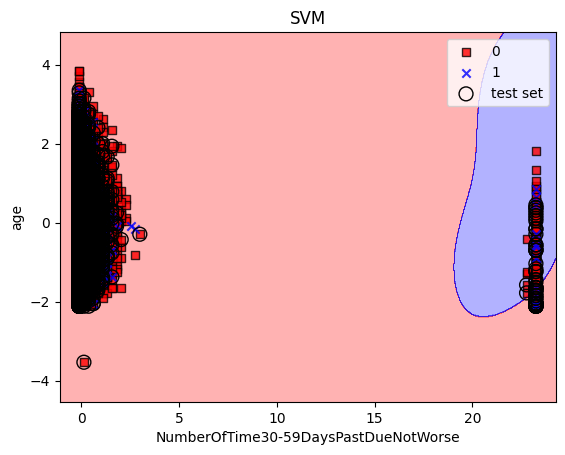

In [16]:
svm = SVC(gamma = 0.1, C = 10, kernel = 'rbf')
# Logistic Regression
svm.fit(XX_train, y_train)
y_pred = svm.predict(XX_train)
print(f'SVM accuracy train: {accuracy_score(y_train, y_pred)}')
y_pred = svm.predict(XX_test)
print(f'SVM accuracy test: {accuracy_score(y_test, y_pred)}')

plot_decision_regions(XX, y.values, classifier=svm, test_idx=range(XX_train.shape[0], 150000))
plt.xlabel(f'{selected_features[0]}')
plt.ylabel(f'{selected_features[1]}')  # 标准化之后，值确实就在这个范围，纵坐标没画错
plt.title('SVM')
plt.legend()
print(sum(y)/len(y))
plt.show()

### Decision Tree

In [14]:
for max_depth in [1,3,6,9,12,15,18,21,24,27]:
    lr = DecisionTreeClassifier(max_depth = max_depth)
    lr.fit(XX_train, y_train)
    y_pred = lr.predict(XX_train)
    print(f'Decision Tree accuracy train: max_depth {max_depth} : {accuracy_score(y_train, y_pred)}')

Decision Tree accuracy train: max_depth 1 : 0.93275
Decision Tree accuracy train: max_depth 3 : 0.93275
Decision Tree accuracy train: max_depth 6 : 0.9332
Decision Tree accuracy train: max_depth 9 : 0.9334333333333333
Decision Tree accuracy train: max_depth 12 : 0.9338916666666667
Decision Tree accuracy train: max_depth 15 : 0.9342833333333334
Decision Tree accuracy train: max_depth 18 : 0.93445
Decision Tree accuracy train: max_depth 21 : 0.9344583333333333
Decision Tree accuracy train: max_depth 24 : 0.9344583333333333
Decision Tree accuracy train: max_depth 27 : 0.9344583333333333


Decision Tree accuracy train: 0.93445
Decision Tree accuracy test: 0.9353333333333333
0.06684


C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\GJX\AppData\Local\Temp\ipykernel_18800\3003974603.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


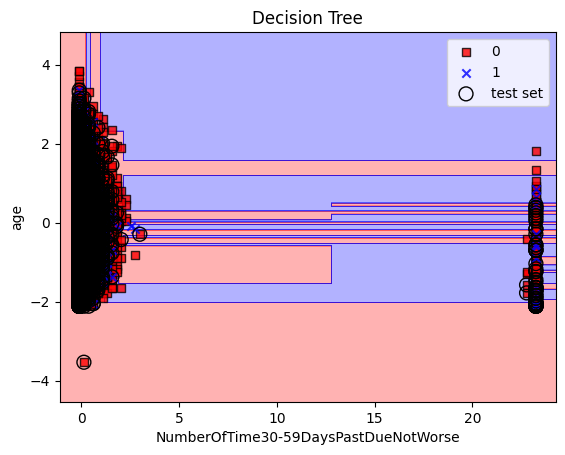

In [15]:
tree = DecisionTreeClassifier(max_depth=18)
# Logistic Regression
tree.fit(XX_train, y_train)
y_pred = tree.predict(XX_train)
print(f'Decision Tree accuracy train: {accuracy_score(y_train, y_pred)}')
y_pred = tree.predict(XX_test)
print(f'Decision Tree accuracy test: {accuracy_score(y_test, y_pred)}')

plot_decision_regions(XX, y.values, classifier=tree, test_idx=range(XX_train.shape[0], 150000))
plt.xlabel(f'{selected_features[0]}')
plt.ylabel(f'{selected_features[1]}')  # 标准化之后，值确实就在这个范围，纵坐标没画错
plt.title('Decision Tree')
plt.legend()
print(sum(y)/len(y))
plt.show()